In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 9 ##

## Histogram Review ##

In [3]:
survey = Table.read_table('welcome_survey.csv')
survey.show(5)

Extroversion,Number of texters,Hours of sleep,Handedness,Pant leg order
7,7,8,Right-handed,Right leg in first
3,4,7,Right-handed,I don't know
9,5,9,Right-handed,Left leg in first
7,8,7,Right-handed,Left leg in first
8,15,6,Right-handed,I don't know
6,3,6.5,Right-handed,Right leg in first
8,10,5,Right-handed,Left leg in first
5,1,6,Right-handed,Left leg in first
3,2,8,Right-handed,I don't know
5,3,7,Right-handed,Right leg in first


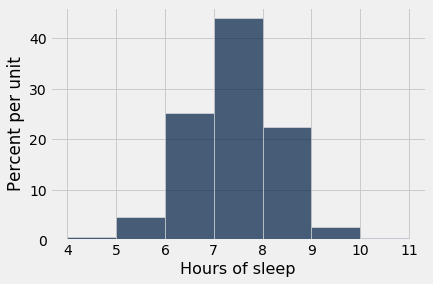

In [4]:
survey.hist('Hours of sleep', bins=np.arange(4, 12))

In [5]:
texters = survey.column('Number of texters')

In [6]:
[min(texters), max(texters)]

[0, 100]

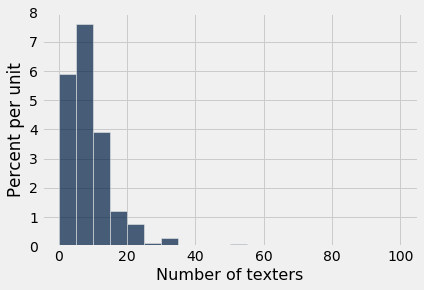

In [31]:
survey.hist('Number of texters', bins=np.arange(0, 101, 5))

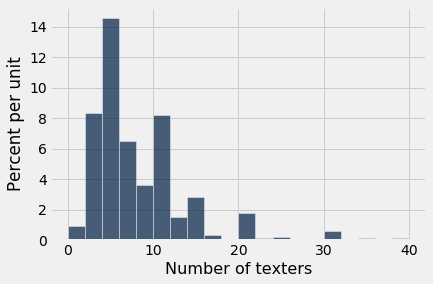

In [8]:
survey.hist('Number of texters', bins=np.arange(0, 41, 2))

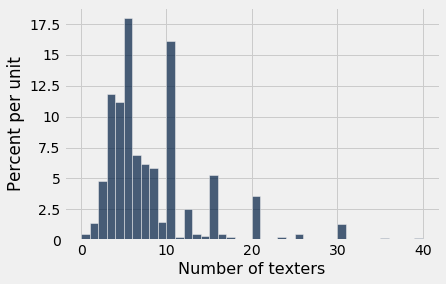

In [9]:
survey.hist('Number of texters', bins=np.arange(0, 41, 1))

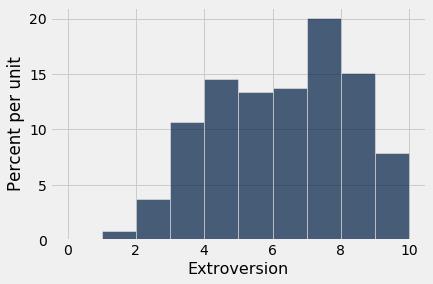

In [10]:
survey.hist('Extroversion', bins=np.arange(0, 11))

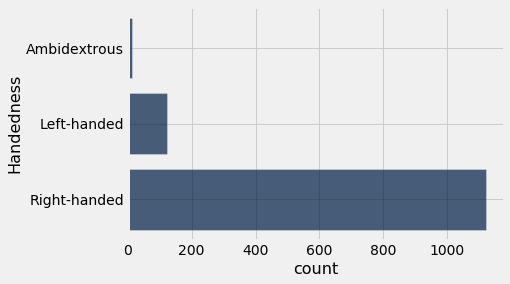

In [11]:
hand_distribution = survey.group('Handedness')
hand_distribution.barh('Handedness')

In [12]:
galton = Table.read_table('galton.csv')

In [33]:
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


In [14]:
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')

In [15]:
heights

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69
75.43,69
73.66,73.5
73.66,72.5
73.66,65.5
73.66,65.5
72.06,71
72.06,68


In [16]:
my_bins = np.arange(55, 80, 2)

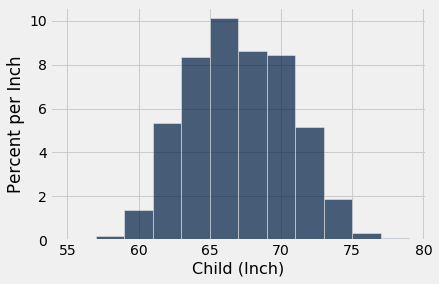

In [17]:
heights.hist('Child', bins = my_bins, unit='Inch')

In [18]:
heights.where('Child', are.between(65, 67)).num_rows / heights.num_rows

0.20235546038543897

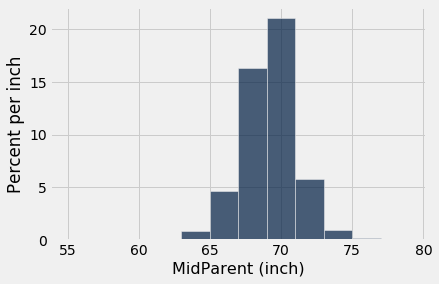

In [19]:
heights.hist('MidParent', bins=my_bins, unit='inch')

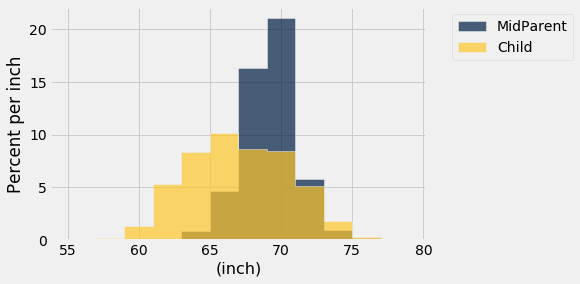

In [21]:
heights.hist(bins=my_bins, unit='inch')

## Functions ##

In [22]:
def double(x):
    return x * 2

In [23]:
double(7)

14

In [24]:
double(15/3)

10.0

In [25]:
my_number = 12

In [26]:
double(my_number)

24

In [27]:
double(my_number / 8)

3.0

In [28]:
double(make_array(3, 4, 5))

array([ 6,  8, 10])

In [29]:
double('data')

'datadata'

In [30]:
x

NameError: name 'x' is not defined

In [ ]:
x = 17

In [ ]:
double(2)

In [ ]:
x

In [ ]:
double(x)

In [ ]:
x

In [ ]:
def percents(values):
    return np.round(values / sum(values) * 100, 2)

In [ ]:
percents(make_array(1, 2, 3, 4))

In [ ]:
percents(make_array(1, 4, 30))

In [ ]:
def percents(values, places):
    return np.round(values / sum(values) * 100, places)

In [ ]:
percents(make_array(1, 4, 30), 1)

## Apply ##

In [ ]:
ages = Table().with_column(
    'Person', make_array('A', 'B', 'C', 'D'),
    'Age', make_array(63, 110, 99, 102)
)
ages

In [ ]:
def cut_off_at_100(z):
    return min(z, 100)

In [ ]:
cut_off_at_100(3)

In [ ]:
cut_off_at_100(107)

In [ ]:
cut_age_array = ages.apply(cut_off_at_100, 'Age')
cut_age_array

In [ ]:
ages.with_column('Cut off ages', cut_age_array)

In [ ]:
type(cut_off_at_100)

## Prediction ##

In [ ]:
heights

In [ ]:
heights.scatter('MidParent', 'Child')

In [ ]:
heights.scatter('MidParent', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [ ]:
nearby = heights.where('MidParent', are.between(67.5, 68.5))
nearby.column('Child').mean()

In [ ]:
heights.scatter('MidParent', 'Child')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, 66.24, color='gold', s=75);

In [ ]:
def predict_child(h):
    nearby = heights.where('MidParent', are.between(h-0.5, h+0.5))
    return nearby.column('Child').mean()

In [ ]:
predict_child(68)

In [ ]:
predict_child(65)

In [ ]:
predictions = heights.apply(predict_child, 'MidParent')

In [ ]:
heights = heights.with_column('Child Prediction', predictions)

In [ ]:
heights

In [ ]:
heights.scatter('MidParent')